In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.constants as const


Text(0, 0.5, 'output vol')

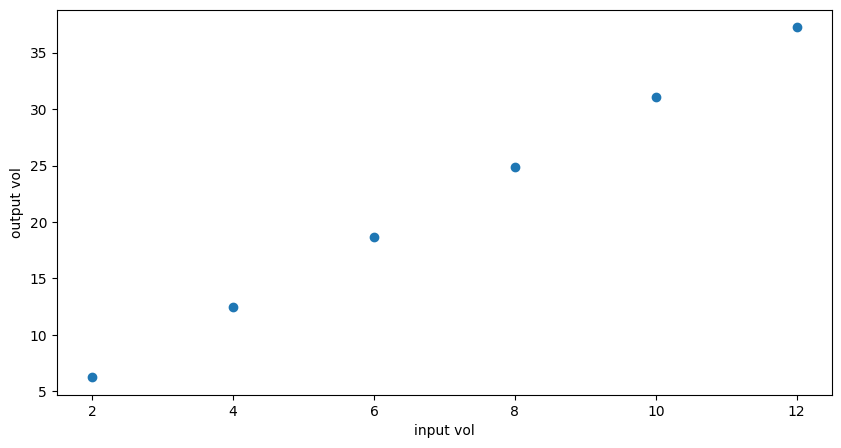

In [5]:
data = np.loadtxt('data/manual.txt', skiprows=1)

# Data
I = data[:, 0]
B = data[:, 1]
V = data[:, 2]

plt.figure(figsize=(10, 5))
plt.subplot
plt.plot(I, B, 'o', label='Data')
plt.xlabel('input vol')
plt.ylabel('output vol')



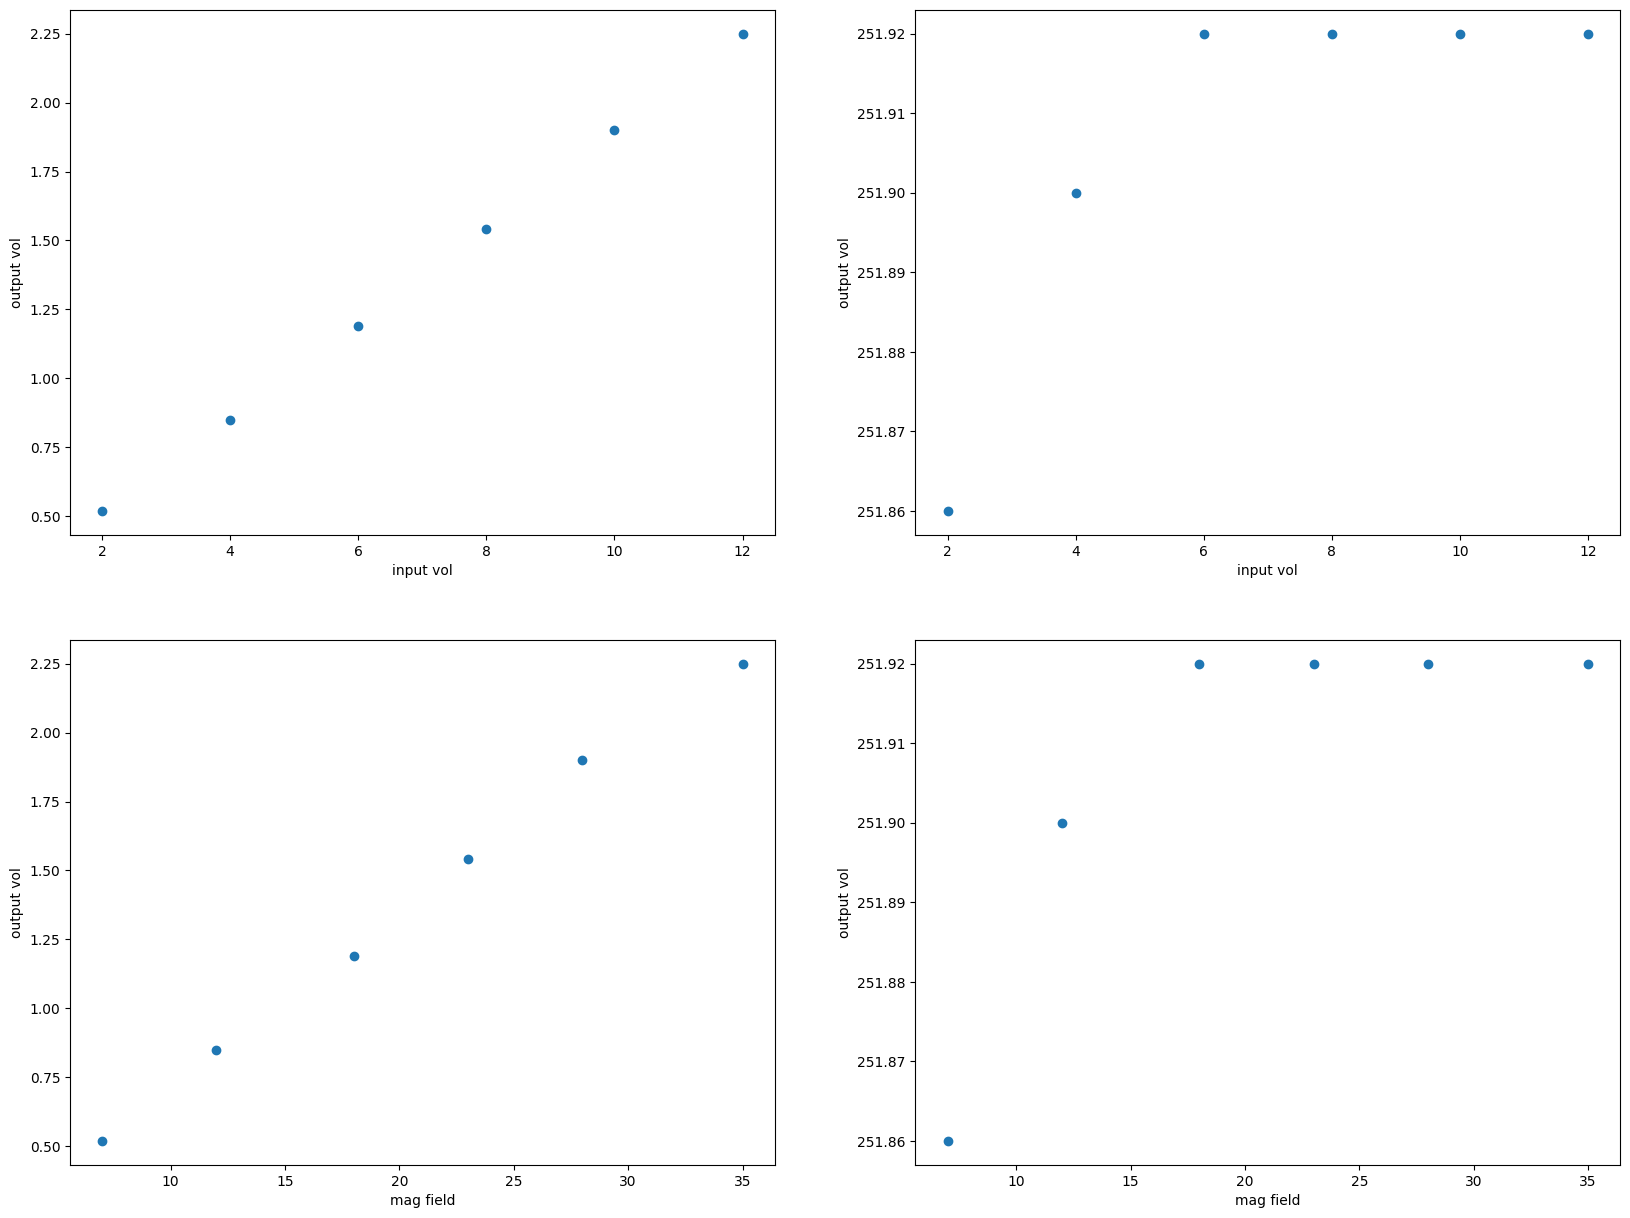

0.012277881953745871
5.149877254472435e+26


In [77]:
data = np.loadtxt('data/hall_mag_manual.txt', skiprows=3)
data_long = np.loadtxt('data/long_mag_manual.txt', skiprows=3)
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(data[:, 0], data[:, 1], 'o', label='Data')
plt.xlabel('input vol')
plt.ylabel('output vol')
plt.subplot(2,2,2)
plt.plot(data_long[:, 0], data_long[:, 1], 'o', label='Data')
plt.xlabel('input vol')
plt.ylabel('output vol')
plt.subplot(2,2,3)
plt.plot(data[:, 3], data[:, 1], 'o', label='Data')
plt.xlabel('mag field')
plt.ylabel('output vol')
plt.subplot(2,2,4)
plt.plot(data_long[:, 3], data_long[:, 1], 'o', label='Data')
plt.xlabel('mag field')
plt.ylabel('output vol')
plt.show()
long = np.mean(data_long[:, 1])
R = data[:,1]/data[:,2]
R_mean = np.mean(R)
Rsq = R_mean*1/3
print(Rsq)
n = long/(Rsq*1.6*10**-19*0.83*300*1e-6)
print(n)


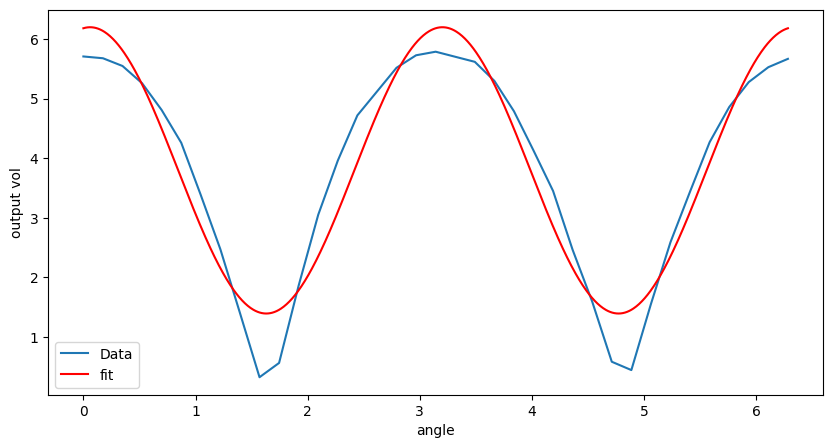

[ 2.40548323 -0.12027382  3.7959637 ]
the standard deviation is 0.015006714974806728 on the amplitude, and 0.0026046484803369666 on the phase


In [72]:
data = np.loadtxt('data/angle.txt', skiprows=2)
vol = data[:, 0]
angle = np.deg2rad(data[:, 1])
# x and b are in degrees, a is an amplitude constant

def func(x, a, b,c):
    return (a*np.cos(2*x + b)+c)

popt, pcov = curve_fit(func, angle, vol,p0 = (2.8,0,3))

angle_range = np.linspace(0, 2*np.pi, 1000)
plt.figure(figsize=(10, 5))
plt.plot(angle, vol, label='Data')
plt.plot(angle_range, func(angle_range, *popt), 'r-', label='fit')
plt.xlabel('angle')
plt.ylabel('output vol')
plt.legend()
plt.show()
print(popt)
print(f'the standard deviation is {np.abs(np.diag(pcov)[0])} on the amplitude, and {np.abs(np.diag(pcov)[1])} on the phase')


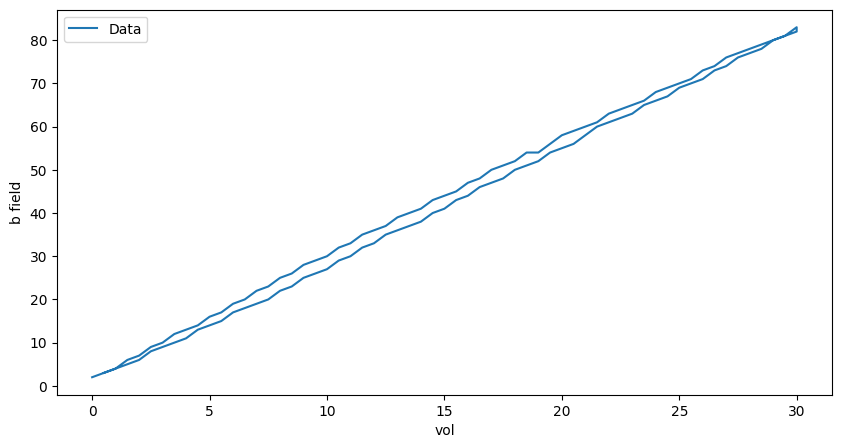

In [67]:
data =np.loadtxt('data/b_field_calibration.txt', skiprows=2)
vol = data[:, 0]
current = data[:, 1]
b_field = data[:, 2]
# x and b are in degrees, a is an amplitude constant
plt.figure(figsize=(10, 5))
plt.plot(vol, b_field, label='Data')

plt.xlabel('vol')
plt.ylabel('b field')
plt.legend()
plt.show()